# Random Initialization

Random initialization of ReLU layers typically use the He et al. formulation of $N(0, \sqrt\frac{2}{\text{fan_in}})$ however this is only an approximation of a variance scaling initialization. A more accurate scaling would use $N(0, \sqrt\frac{2}{Var(W)})$.

## References

- https://arxiv.org/abs/1502.01852

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fan_in = 64
fan_out = 64
gain = 2.0
figsize = (8, 4)

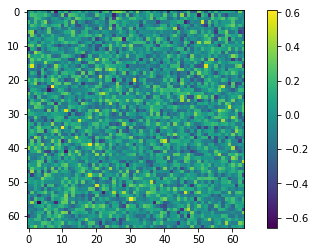

In [5]:
X = tf.random.normal(shape=[fan_in, fan_out], mean=0.0, stddev=1.0)
X_norm_fan = X * tf.sqrt(2 / fan_in)
plt.figure(figsize=figsize)
plt.imshow(X_norm_fan, interpolation=None)
plt.colorbar()

In [6]:
col_var = tf.sqrt(2 / tf.reduce_sum(tf.square(X_norm_fan), axis=0, keepdims=True))
tf.reduce_mean(col_var).numpy()

1.0146139

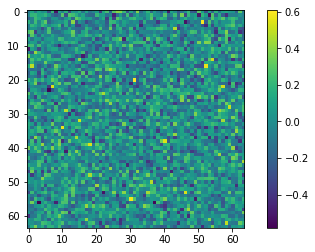

In [7]:
X_norm_var = X * tf.sqrt(gain / tf.reduce_sum(tf.square(X), axis=0, keepdims=True))
plt.figure(figsize=figsize)
plt.imshow(X_norm_var, interpolation=None)
plt.colorbar()

In [8]:
col_var = tf.sqrt(2 / tf.reduce_sum(tf.square(X_norm_var), axis=0, keepdims=True))
tf.reduce_mean(col_var).numpy()

1.0

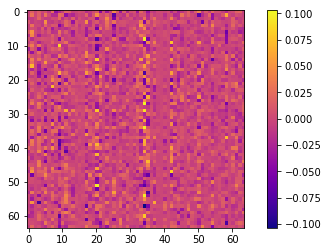

In [9]:
X_norm_diff = X_norm_fan - X_norm_var
plt.figure(figsize=figsize)
plt.imshow(X_norm_diff, interpolation=None, cmap='plasma')
plt.colorbar()

In [47]:
n = 10000
a = np.random.normal(size=n, loc=+1.0, scale=0.5)
b = np.random.normal(size=n, loc=-1.0, scale=0.5)
c = np.random.binomial(1, p=0.5, size=n)
d = c * a + (1 - c) * b

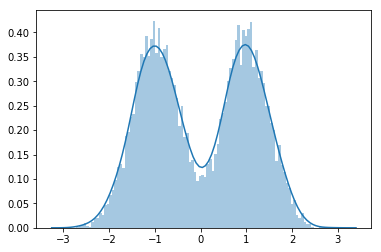

In [46]:
sns.distplot(d, bins=100)